**Archived scripts used when making NetflixData.py and NetflixGenreData.py**

The script imports the ratings and genre info.

The genre info is from a csv file on GitHub.

The ratings are from Cornac.

The titles for movies is refined from a csv file on GitHub.

In [58]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
import os
import pandas as pd

### Ratings

In [60]:
dropbox_path = os.path.abspath("D:/Dropbox/datasets")
onedrive_path = os.path.abspath("D:/OneDrive - Singapore Management University/datasets")

# ratings_path = os.path.join(onedrive_path, "netflix-cornac", "data.csv") # 2.43GB processed UIRT dataset from cornac: U480k, I17770, R100M
ratings_path = os.path.join(onedrive_path, "netflix-cornac", "data_small.csv") # 15MB processed UIRT dataset from cornac: U10k, I4945, R608k
titles_path = os.path.join(onedrive_path, "netflix-cornac", "movie_titles.csv") # processed IYN dataset: I=item, Y=year, N=name
genres_path = os.path.join(onedrive_path, "netflix-genres", "netflix_genres.csv") # processed

In [61]:
names = ['uid','iid','rating','date']
df_ratings = pd.read_csv(ratings_path, header=None, names=names)
df_ratings.head()

,uid,iid,rating,date
0,2567280,2,3,2005-03-17
1,1478381,3,4,2005-05-26
2,1045221,3,1,2003-05-13
3,811218,3,5,2004-05-11
4,1272379,3,1,2005-01-19


In [62]:
df_ratings['row_idx'] = pd.factorize(df_ratings['uid'])[0]
df_ratings['col_idx'] = pd.factorize(df_ratings['iid'])[0]

In [63]:
df_ratings.head(50)

,uid,iid,rating,date,row_idx,col_idx
0,2567280,2,3,2005-03-17,0,0
1,1478381,3,4,2005-05-26,1,1
2,1045221,3,1,2003-05-13,2,1
3,811218,3,5,2004-05-11,3,1
4,1272379,3,1,2005-01-19,4,1
5,1697078,3,2,2005-01-04,5,1
6,2040110,3,3,2005-10-30,6,1
7,1200589,3,3,2004-02-23,7,1
8,222897,3,4,2004-03-26,8,1
9,1416480,3,3,2003-07-09,9,1


In [64]:
df_U_idmap = df_ratings.drop_duplicates(subset=['uid', 'row_idx'])[['uid', 'row_idx']]

df_idmap_I = df_ratings.drop_duplicates(subset=['iid', 'col_idx'])[['iid', 'col_idx']]

df_triplet = df_ratings[['row_idx', 'col_idx', 'rating']]

In [65]:
df_U_idmap.tail(50)

,uid,row_idx
421171,247926,9942
421369,2482617,9943
421488,973741,9944
422192,2220193,9945
424580,1212076,9946
427556,2575942,9947
430357,146588,9948
437374,2053046,9949
439407,207996,9950
439670,1798370,9951


In [66]:
df_ratings.index

RangeIndex(start=0, stop=607803, step=1)

In [67]:
print("Dimensions: ", df_ratings.shape)
print("Number of users: %d" % df_ratings.uid.drop_duplicates().count())
print("Number of items: %d" % df_ratings.iid.drop_duplicates().count())
print("Starting date:", df_ratings['date'].min())
print("Ending date:", df_ratings['date'].max())

Dimensions:  (607803, 6)
Number of users: 9992
Number of items: 4945
Starting date: 1999-12-24
Ending date: 2005-12-31


In [68]:
# Convert 'date' column to datetime type if it's not already
df_ratings['date'] = pd.to_datetime(df_ratings['date'])

# Group by year and month and count the items
month_counts = df_ratings.groupby([df_ratings['date'].dt.year, df_ratings['date'].dt.month]).size()

years = []
months = []
for i in month_counts.index:
    y, m = i
    years.append(y)
    months.append(m)

df_month_counts = pd.DataFrame({'year': years, 'month': months, 'count':month_counts.values})
df_month_counts.head()

,year,month,count
0,1999,12,14
1,2000,1,482
2,2000,2,370
3,2000,3,217
4,2000,4,241


In [69]:
df_ratings.head()

,uid,iid,rating,date,row_idx,col_idx
0,2567280,2,3,2005-03-17,0,0
1,1478381,3,4,2005-05-26,1,1
2,1045221,3,1,2003-05-13,2,1
3,811218,3,5,2004-05-11,3,1
4,1272379,3,1,2005-01-19,4,1


C:\Users\nieht\AppData\Local\Temp\ipykernel_20828\3993941599.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(tick_labels, rotation=45, ha='right')


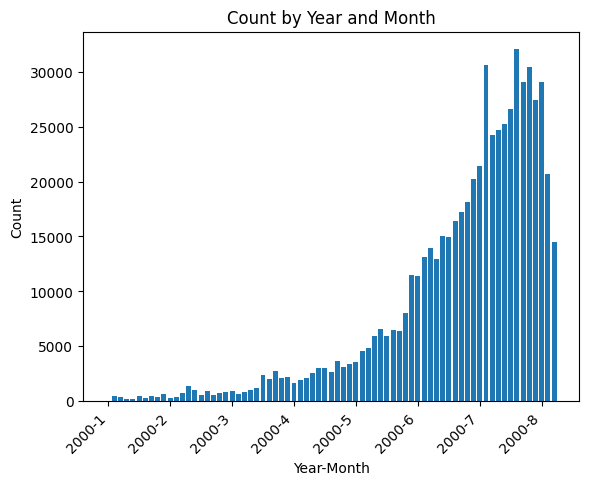

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the 'mc' DataFrame defined

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the bar chart
ax.bar(df_month_counts.index, df_month_counts['count'])

# Set x-axis tick labels
tick_labels = [f"{year}-{month}" for year, month in zip(df_month_counts['year'], df_month_counts['month'])]
ax.set_xticklabels(tick_labels, rotation=45, ha='right')

# Set axis labels and title
ax.set_xlabel('Year-Month')
ax.set_ylabel('Count')
ax.set_title('Count by Year and Month')

# Display the plot
plt.show()

### Titles

In [71]:
names = ['item', 'year', 'name']
df_titles = pd.read_csv(titles_path, header=None, names=names)
df_titles.head()

,item,year,name
0,1,2003,Dinosaur Planet
1,2,2004,Isle of Man TT 2004 Review
2,3,1997,Character
3,4,1994,Paula Abdul's Get Up & Dance
4,5,2004,The Rise and Fall of ECW


In [72]:
year_counts = df_titles.groupby(df_titles['year']).size()
year_counts

year
1896       1
1909       1
1914       2
1915       5
1916       4
        ... 
2001    1184
2002    1313
2003    1271
2004    1436
2005     512
Length: 94, dtype: int64

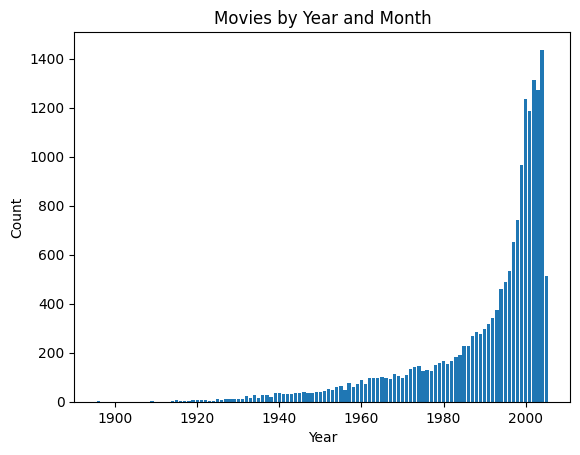

In [87]:
import numpy as np

years = np.array(year_counts.index)
counts = np.array(year_counts)

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the bar chart
ax.bar(years, counts)

# # Set x-axis tick labels
# tick_labels = [f"{year}-{month}" for year, month in zip(df_month_counts['year'], df_month_counts['month'])]
# ax.set_xticklabels(tick_labels, rotation=45, ha='right')

# Set axis labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Movies by Year and Month')

# Display the plot
plt.show()

### Genres

In [48]:
# load prepared genre csv
df_genres = pd.read_csv(genres_path)

# Split genres into separate columns
genres = df_genres['genres'].str.get_dummies(sep='|')

# Concatenate movieId column with one-hot encoded genres
one_hot_data = pd.concat([df_genres['movieId'], genres], axis=1)

# Display the resulting dataframe
one_hot_data.head()

,movieId,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,1,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,6,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# read genres

df = pd.read_csv(genres_path)
df = df.rename(columns={'movieId': 'iid'})

# Split genres into separate columns
genres = df['genres'].str.get_dummies(sep='|')

# Concatenate iid column with one-hot encoded genres
df_genres = pd.concat([df['iid'], genres], axis=1)

# Display the resulting dataframe
df_genres.head()

,iid,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,1,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,6,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df

,iid,genres
0,1,Documentary|Animation|Family
1,3,Crime|Drama|Mystery
2,4,Family
3,5,Documentary|Sport
4,6,Documentary
...,...,...
12274,17764,Comedy|Drama|History|Romance
12275,17765,Action|Adventure|Family|Sci-Fi
12276,17768,Action|Drama|Fantasy
12277,17769,Drama|Music|Romance


In [51]:
df_genres.shape # only 12279 of them have genre data

(12279, 28)

In [52]:
one_hot_data.columns

Index(['movieId', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir',
       'Game-Show', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show',
       'Thriller', 'War', 'Western'],
      dtype='object')

In [53]:
a = one_hot_data.sum()
print(a[a > 12279 / 100].index[1:].tolist())

['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western']


### Dirty work

### Drop genres < 1%

In [54]:
from copy import deepcopy

df_genres = deepcopy(one_hot_data)

idx = df_genres[ (df_genres['Film-Noir']==1) | (df_genres['Game-Show']==1) | (df_genres['News']==1) | (df_genres['Reality-TV']==1) | (df_genres['Talk-Show']==1) ].index

df_genres.drop(idx , inplace=True)

df_genres.drop(columns=['Film-Noir', 'Game-Show', 'News', 'Reality-TV', 'Talk-Show'], axis=1, inplace=True)

df_genres

,movieId,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,1,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,6,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12274,17764,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
12275,17765,1,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
12276,17768,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
12277,17769,0,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0


### Filtering movies

In [55]:
new_df = df_ratings[    df_ratings['iid'].isin(df_genres['movieId'])    ]
print("# of ratings of the filtered movies")
new_df.shape

# of ratings of the filtered movies


(540413, 6)

In [57]:
print("# of users: ", new_df['uid'].nunique(), ", # of movies: ", new_df['iid'].nunique())

# of users:  9980 , # of movies:  3362


In [ ]:
new_df.head()

,user,item,rating,date
1,1478381,3,4,2005-05-26
2,1045221,3,1,2003-05-13
3,811218,3,5,2004-05-11
4,1272379,3,1,2005-01-19
5,1697078,3,2,2005-01-04
